# Using welch's t test to compare causes of death

### Importing required libraries

In [1]:
#importing required libraries to clean and preprocess the data
import pandas as pd
import numpy as np
from statistics import variance
import numpy as np
import scipy.stats
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Color index for using it later on
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m' 
    DARKCYAN = '\033[36m' 
    BLUE = '\033[94m' 
    GREEN = '\033[92m' 
    YELLOW = '\033[93m' 
    RED = '\033[91m'
    BOLD = '\033[1m' 
    UNDERLINE = '\033[4m' 
    END = '\033[0m'

__Importing annual death by causes dataset (downloaded from oxford university's portal)__

In [194]:
#dataset source : https://ourworldindata.org/causes-of-death (Oxford University)
#importing the csv file into python
df = pd.read_csv("annual_deaths_by_cause.csv")

__pre-processing the dataset__

In [195]:
df.head(5)

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


In [193]:
#Droping Excecutions, as in most countries execution is illegal
df.drop(['Number of executions (Amnesty International)'],inplace=True,axis=1)

In [191]:
#Renaming the column names to more suitable names
new_column_names = ['country', 'code', 'year', 'meningitis', "alzheimer's_diesease",
       "parkinson's_disease", 'nutritional_deficiency', 'malaria', "drowning",
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis']

df.set_axis(new_column_names, axis=1, inplace=True)

In [5]:
df

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0


In [6]:
#Overview of the variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

In [7]:
#A statistical summar of the dataset
df.describe()

,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
count,7273.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,2891.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000
mean,2004.425134,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,349.235905,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520
std,8.623572,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1917.143788,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,0.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000
50%,2004.000000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,5.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,60.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,44490.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000


In [8]:
df.head(5)

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


__User Defined Function : Filling NA values__

In [9]:
#Function to fill NA values
def fillNa(df):
    columnNames = list(df.columns)
    for col in columnNames: 
        df[col] = df[col].fillna(df[col].mean())

__User Defined Function : Creating subsets based on country__

In [10]:
#Functio to create a subset based ont the country name
def getSubset(df, countryName):
    
    df_new = df[df["country"]==countryName] #Creating a subset with only the specific country's data
    #Removing the redundant columns
    df_new.index = df_new["year"] #Setting year as the index valus
    df_new.drop(["country","code","year"],inplace=True, axis=1) # Dropping all categorical columns
    fillNa(df_new) #Filling NA or missing values
    #Typecasting deaths to integers
    df_new[list(df_new.columns)] = df_new[list(df_new.columns)].astype("int64") 
    
    return df_new

__User Defined Function : Creating a subset of all countries except queried__

In [11]:
#Creating a subset with countries except specified country
#row : rest of the world
def rowSubset(df,df_to_be_removed):
    df_row = df.drop(df_to_be_removed.index)
    #Filling the na values of Rest of the world dataframe
    fillNa(df_row.iloc[:,3:35])
    df_row.dropna(inplace=True)
    df_row['year'] = df_row['year'].astype("object")
    df_row = df_row.groupby(['year']).mean().round()
    df_row[list(df_row.columns)] = df_row[list(df_row.columns)].astype("int64")
    
    return df_row

__User Defined Function : conducting Welch's t-test for all variables of two datasets__

In [12]:
#Welch's t test of unequal variance
def t_test(df1, df2):
    p_values = []
    for col in list(df1.columns):
        x = scipy.stats.ttest_ind(a=np.array(df1[col]), b=np.array(df2[col]), equal_var=False)
        p_values.append([col,x[0],x[1]])
    
    return p_values

__User Defined Function : to check whether the p values are greater than level of significance__

In [13]:
def acceptedVals(arr,level_of_sig):
    acceptance = 1-lev
    for x in level_of_sig:
        if x[2]>0.05:
            print(x)

__User Defined Function : For header of the generalised t-test result__

In [14]:
def headerResult(country1,country2,level_of_sig,variable,statistic,p_value):
    header = (color.BLUE+" Welch's T Test for comparing "+country1+
    "'s and "+country2+"'s "+variable+" deaths. "+color.END)
    print(header.center(110,"-"))

    print("\n -> "+color.UNDERLINE+"Null Hypothesis (Ho) [µO=µ1]" +color.END +
        "\nThere is no significant difference in the average of deaths caused by "
         +variable+" in ",country1 + " and " + country2 + "." )

    print("\n -> "+color.UNDERLINE+ "Allternate Hypothesis (H1) [µO≠µ1]" +color.END +
        "\nThere is a significant difference in the average of deaths caused by "
         +variable+" in ",country1 + " and " + country2 +".")
    
    print("\n -> "+color.UNDERLINE+ "Confidence Level Interval : " +color.END + str(1-level_of_sig))

    print(color.BOLD+"\n- Statistic (t) value : " +color.END , round(float(statistic),9))
    print(color.BOLD+"- Probability (p) value : " +color.END , "{:.40f}". format(p_value))  

__User Defined Function : to plot a line graph and a bar plot of the values of given variable__

In [162]:
def plotGraph(df1, df2, variable,country1,country2):
    
    palette = sns.color_palette()

    c1 = random.choice(palette)
    idx = palette.index(c1)
    palette.pop(idx)
    c2 = random.choice(palette)
    
    plt.figure(figsize=(5, 5))
    plt.title(str(variable + " (DEATHS PER 100,000 OF POPULATION)"))
    plot_one = sns.lineplot(data = df1, x = 'year', y = variable, color = c1 , label = country1)
    plot_two = sns.lineplot(data = df2, x = 'year', y = variable, color = c2, label = country2)
    plt.show()
    

    plt.figure(figsize=(5, 5))
    plt.title("Average Deaths per 100,000 from 1990-2021")
    plt.bar(x=[country1,country2],height=[df1[variable].mean(),
                                          df2[variable].mean()],color=[c1,c2])
    plt.show()
    

__User Defined Function : To properly display the Welch's t-test result and visualisations__

In [163]:
def finalResult(df1,df2,values,country1,country2,level_of_sig,show_only_nnullAcceptance = False):
    for val in values:
        variable = val[0]
        statistic = val[1]
        p_value = val[2]
        

        #Rejecting null hypothesis
        if p_value<level_of_sig:
            
            if show_only_nnullAcceptance:
                pass
            
            else:
                headerResult(country1,country2,level_of_sig,variable,statistic,p_value)
                print(color.BOLD + "\n- Decision" +color.END)
                print("As p value (", "{:.40f}". format(p_value) , 
                      ") is less than level of significance (" , level_of_sig,
                      "),\nWe Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}")

                print(color.BOLD + "\n- Statistical Inference" +color.END)
                print("There is a significant difference in the average of no. deaths caused by "
                 +variable+" in ",country1 + " and " + country2 +"."+
                      "\nTime period : Past 30 years (1991-2019)\n")
                

                plotGraph(df1,df2,variable,country1,country2)
                plt.pause(0.0001)
                
                print("\n")
                print("-"*100)
                print("\n")
                
        
        else:
            
            headerResult(country1,country2,level_of_sig,variable,statistic,p_value)
            print(color.BOLD + "\n- Decision" +color.END)
            print("As p value (", "{:.40f}". format(p_value) , 
                  ") is greater than level of significance (" , level_of_sig,
                  "),\nWe Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}")
            
            print(color.BOLD + "\n- Statistical Inference" +color.END)
            print("There is no significant difference in the average of no. deaths caused by "
             +variable+" in ",country1 + " and " + country2 +"."+
                  "\nTime period : Past 30 years (1991-2019)\n")
            
            plotGraph(df1,df2,variable,country1,country2)
            plt.pause(0.0001)
        
            print("\n")
            print("-"*100)
            print("\n")

__User Defined Function : Standardize the datasets according to deaths per 100,000 people of a population__

In [164]:
#Creating a user-defined function to standardize the data for every 100,000 people in the population
def normalizeDf(df_cont,pop_arr):
    for index in range(0,len(df_cont)):
        df_cont.iloc[index] = (df_cont.iloc[index]/pop_arr[index])*100000

__Creating subsets using previously created user-defined function, according to country name__

In [165]:
#Getting subsets (samples) of data for 36 variables, 30 years for these specific countries
df_india = getSubset(df,"India").sort_index(ascending=True)
df_china = getSubset(df,"China").sort_index(ascending=True)
df_usa = getSubset(df, "United States").sort_index(ascending=True)
df_uk = getSubset(df, "United Kingdom").sort_index(ascending=True)
df_som = getSubset(df, "Somalia").sort_index(ascending=True)

__Importing the file that holds population of the above countries (downloaded from world statistics forum)__

In [166]:
#Importing the population of the 5 countries to be analysed
df_population = pd.read_excel("population.xlsx")

In [167]:
df_population

,Country,Year,Population
0,India,1990,870452165
1,India,1991,888941756
2,India,1992,907574049
3,India,1993,926351297
4,India,1994,945261958
...,...,...,...
145,Somalia,2015,13763906
146,Somalia,2016,14292847
147,Somalia,2017,14864221
148,Somalia,2018,15411094


__Standrdizing data according to their respective populations__

In [168]:
#Population of countries in order from 1990 to 2019
india_population_arr = list(df_population[df_population["Country"]=="India"]["Population"])
som_population_arr = list(df_population[df_population["Country"]=="Somalia"]["Population"])
uk_population_arr = list(df_population[df_population["Country"]=="UK"]["Population"])
usa_population_arr = list(df_population[df_population["Country"]=="USA"]["Population"])
china_population_arr = list(df_population[df_population["Country"]=="China"]["Population"])

In [169]:
#Normalising the dataset to make the data uniform to deaths per 1000 of the population
normalizeDf(df_india,india_population_arr)
normalizeDf(df_som,som_population_arr)
normalizeDf(df_uk,uk_population_arr)
normalizeDf(df_usa,usa_population_arr)
normalizeDf(df_china,china_population_arr)

__Performing t-test with the help of pre-defined functions__

In [181]:
# Welch's t-test on specific country combinations using user-defined functions
us_china_t_test = t_test(df_usa,df_china)
us_uk_t_test = t_test(df_usa,df_uk)
usa_som_t_test = t_test(df_usa,df_som)
usa_india_t_test = t_test(df_india,df_usa)
ind_uk_t_test = t_test(df_india,df_uk)
ind_chn_t_test = t_test(df_india,df_china)

# Final tests

## Comparing India and USA's causes of death

------------------ Welch's T Test for comparing USA's and INDIA's hiv/aids deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by hiv/aids in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by hiv/aids in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.494069489
- Probability (p) value :  0.6231231832055129649106106626277323812246

- Decision
As p value ( 0.6231231832055129649106106626277323812246 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by hiv/aids in  USA and INDIA.
Time period : Past 30 years (1991-2019)



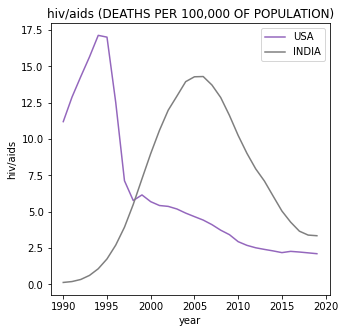

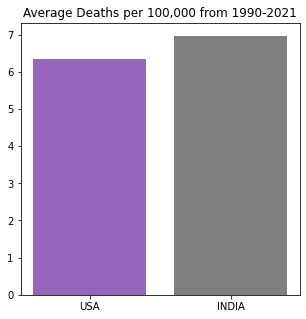



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and INDIA's conflict_and_terrorism deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by conflict_and_terrorism in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by conflict_and_terrorism in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  1.508839815
- Probability (p) value :  0.1374514382619866081913784228163422085345

- Decision
As p value ( 0.1374514382619866081913784228163422085345 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by conflict_and_terrorism in  USA and INDIA.
Time period : Past 3

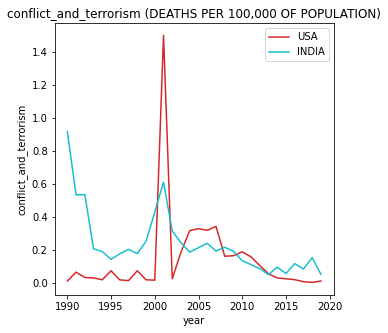

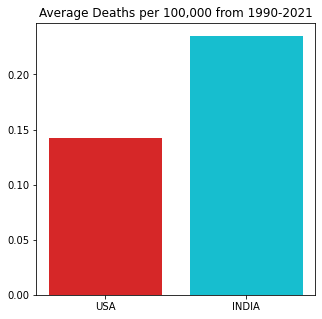



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and INDIA's terrorism deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by terrorism in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by terrorism in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.273373034
- Probability (p) value :  0.7864347641236840713574451910972129553556

- Decision
As p value ( 0.7864347641236840713574451910972129553556 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by terrorism in  USA and INDIA.
Time period : Past 30 years (1991-2019)



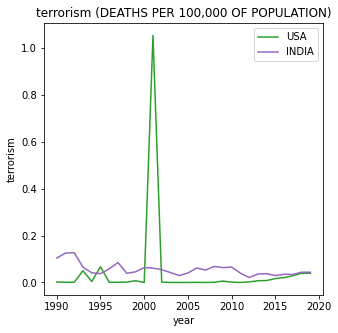

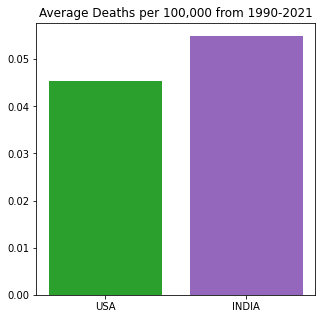



----------------------------------------------------------------------------------------------------


--------------- Welch's T Test for comparing USA's and INDIA's road_injuries deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by road_injuries in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by road_injuries in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.076152578
- Probability (p) value :  0.9397482316315335371115224916138686239719

- Decision
As p value ( 0.9397482316315335371115224916138686239719 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by road_injuries in  USA and INDIA.
Time period : Past 30 years (1991-2019)



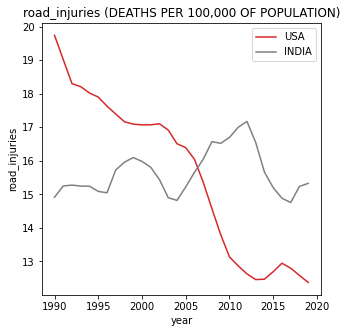

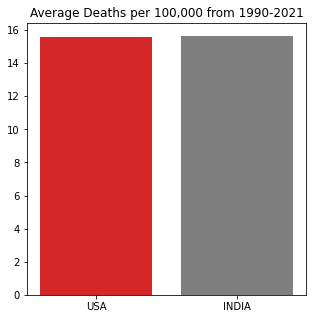



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and INDIA's digestive_diseases deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by digestive_diseases in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by digestive_diseases in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  1.277889417
- Probability (p) value :  0.2073849539114311080201247250442975200713

- Decision
As p value ( 0.2073849539114311080201247250442975200713 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by digestive_diseases in  USA and INDIA.
Time period : Past 30 years (199

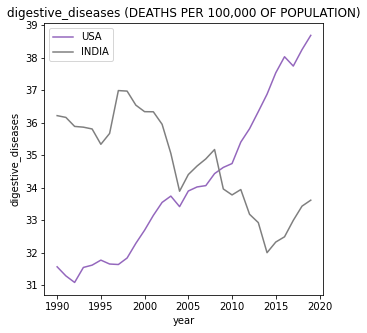

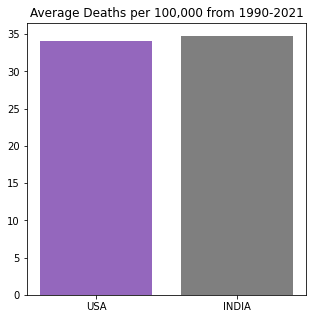



----------------------------------------------------------------------------------------------------




In [202]:
finalResult(df_usa,df_india,usa_india_t_test,"USA","INDIA",0.05,show_only_nnullAcceptance = True)

## Comparing India and China's causes of death

In [201]:
#finalResult(df_india,df_china,usa_som_t_test,"INDIA","CHINA",0.05,show_only_nnullAcceptance = False)

## Comparing USA and UK's causes of death

In [196]:
#finalResult(df_usa,df_uk,us_uk_t_test,"USA","UK",0.05,show_only_nnullAcceptance = False)

## Comparing USA and Somalia's causes of death

In [197]:
#finalResult(df_usa,df_som,usa_som_t_test,"USA","SOMALIA",0.05,show_only_nnullAcceptance = False)

## Comparing USA and China's causes of death

In [198]:
#finalResult(df_usa,df_china,us_china_t_test,"USA","CHINA",0.05,show_only_nnullAcceptance = False)

## Comparing India and UK's causes of death

In [199]:
#finalResult(df_india, df_uk,ind_uk_t_test ,"INDIA","UK",0.05,show_only_nnullAcceptance = False)